In [1]:
import matlab.engine

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
eng = matlab.engine.start_matlab()

In [8]:
simOpts = eng.struct('noiseVar', 0.16, 'noiseCorrCoeff', 0, 'sourceEnergy', 6.3)
data = eng.rotating_energy_sources(70, simOpts)

In [5]:
dirname   = 'RES-rn'
bfilename = dirname + '/res'
eng.mkdir( dirname ) 

True

In [6]:
myOpts = eng.struct( 'cmethod', 'phase', 'boolParfor', 0, 'boolUseSavedData', 0, 'errorRate', 0.1, 'bfilename', bfilename)

In [20]:
eng.tic;
Components, Clusters, ClusterInfo, SDFInfo = eng.pasf(data, 2, myOpts, nargout=4)
eng.toc;
Components = np.array(Components._data).reshape(Components.size, order='F')

In [25]:
print( "Component Shape: {}\n" .format(Components.shape) )
d1, d2, d3, d4 = Components.shape

Component Shape:(20, 20, 70, 4)



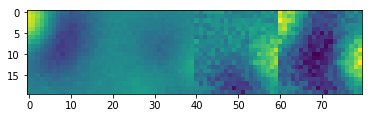

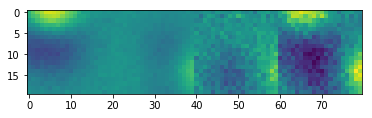

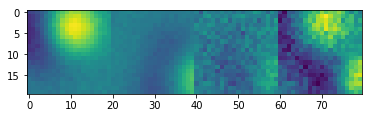

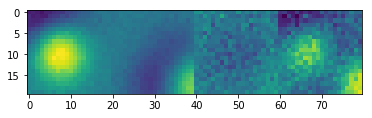

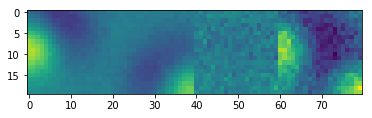

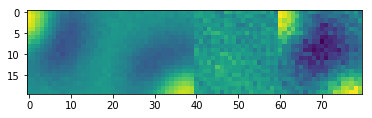

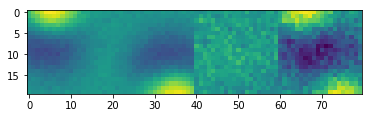

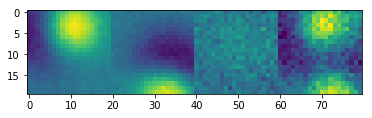

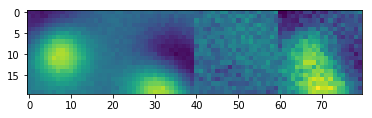

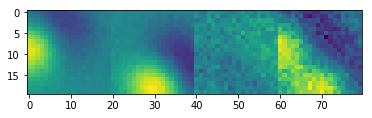

In [29]:
for i in range(10):
    fig = Components[:,:,i,0]
    for c in range(1, d4):
        fig = np.hstack((fig, Components[:,:,i,c]))

    plt.imshow(fig)
    plt.show(block=False)
    #time.sleep(0.3)
    plt.close()